# 1. Introduction

The main question this report explored is what factors made people more likely to survive on the Titanic. Variables that were explored were age, gender and class. 

The dataset that was used was Titanic Data (N=891).

# 2. Analysis

In [106]:
import unicodecsv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

filename = 'Titanic_Dataset_Original.csv'

titanic_df = pd.read_csv(filename)

Data Wrangling

In [107]:
# print titanic_df['SibSp'].count() - used to check number of records and whether empty cells existed
# Replaces empty cells with None
titanic_df['Cabin'].fillna(0)
titanic_df['Age'].fillna(0)

# Convert data types to floats or integers
titanic_df['Age'].astype(float)
titanic_df['Fare'].astype(float)
titanic_df['Parch'].astype(int)
titanic_df['SibSp'].astype(int)

# Convert data type to boolean
titanic_df['Survived'].astype(bool)

0      False
1       True
2       True
3       True
4      False
5      False
6      False
7      False
8       True
9       True
10      True
11      True
12     False
13     False
14     False
15      True
16     False
17      True
18     False
19      True
20     False
21      True
22      True
23      True
24     False
25      True
26     False
27     False
28      True
29     False
       ...  
861    False
862     True
863    False
864    False
865     True
866     True
867    False
868    False
869     True
870    False
871     True
872    False
873    False
874     True
875     True
876    False
877    False
878    False
879     True
880     True
881    False
882    False
883    False
884    False
885    False
886    False
887     True
888    False
889     True
890    False
Name: Survived, dtype: bool

Descriptive statistics and visualisations for entire dataset.

In [108]:
# General descriptive statistics
print titanic_df.describe()

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [109]:
# Number survived vs. number that did not survive
print titanic_df['Survived'].value_counts()

print '% of passengers who did survive: ',(titanic_df['Survived'].mean())*100
print '% of passengers who did not survive: ',(1-titanic_df['Survived'].mean())*100

0    549
1    342
Name: Survived, dtype: int64
% of passengers who did survive:  38.3838383838
% of passengers who did not survive:  61.6161616162


Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
Name: Survived, dtype: int64


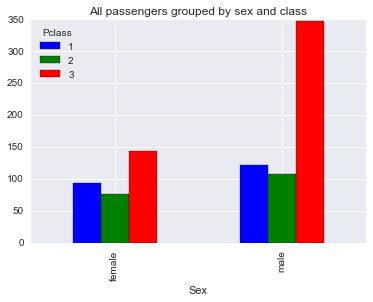

In [110]:
print titanic_df.groupby(['Sex', 'Pclass'])['Survived'].count()
titanic_df.groupby(['Sex', 'Pclass'])['Survived'].count().unstack().plot(kind='bar')
plt.title('All passengers grouped by sex and class')
plt.show()

Pclass      
1       mean    38.233441
        std     14.802856
2       mean    29.877630
        std     14.001077
3       mean    25.140620
        std     12.495398
dtype: float64

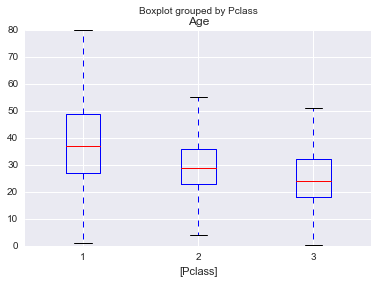

In [111]:
titanic_df.boxplot(column=['Age'], by=['Pclass'])
titanic_df.groupby(['Pclass'])['Age'].describe().loc[:,['mean','std']]

# 2.1. Age of passengers and survival

Note: total count for age is 714 instead of the total 891 records because the dataset contains records that do not have data for particular passengers age.

In [112]:
print 'Count: ', titanic_df['Age'].count()

Count:  714


Question: What was the mean age of survivors versus non-survivors?

In [113]:
survived = titanic_df['Survived']==True
did_not_survive = titanic_df['Survived']==False

The average age of survivors was slightly lower than the age of non-survivors. However overall, there was not much difference between the average ages of survivors versus non-survivors. Compared to the average age overall there was little difference as well.

In [114]:
print 'Average age of passengers on board: ', titanic_df['Age'].mean()
print 'Average age of survivors: ', round((titanic_df[survived]['Age'].mean()),2)
print 'Average age of non-survivors: ', round((titanic_df[did_not_survive]['Age'].mean()),2)

Average age of passengers on board:  29.6991176471
Average age of survivors:  28.34
Average age of non-survivors:  30.63


Something that suggests age was not a more significant factor is that the standard deviation for survivors, non-survivors, and sample as a whole were quite similar.

In [115]:
print "SD of age of survivors: ",titanic_df[survived]['Age'].std()
print "SD of age of non-survivors: ",titanic_df[did_not_survive]['Age'].std()

SD of age of survivors:  14.9509519841
SD of age of non-survivors:  14.1721098771


However, a histogram of the ages of passengers who survived versus those who did not survive showed slightly more passengers who were under 20 years old survived.

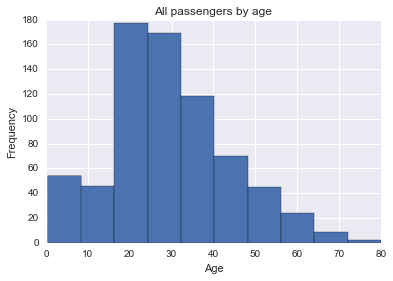

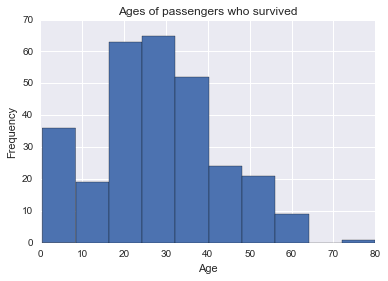

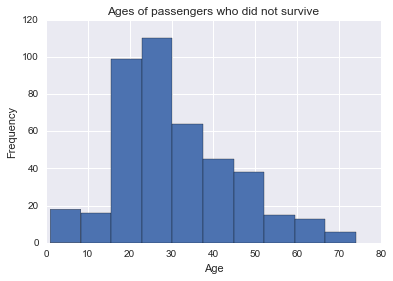

In [116]:
titanic_df['Age'].plot.hist(bins=10)
plt.title('All passengers by age')
plt.xlabel('Age')
plt.show()

(titanic_df[survived]['Age']).plot.hist(bins=10)
plt.title('Ages of passengers who survived')
plt.xlabel('Age')
plt.show()

(titanic_df[did_not_survive]['Age']).plot.hist(bins=10)
plt.title('Ages of passengers who did not survive')
plt.xlabel('Age')
plt.show()

The analysis from above is further demonstrated by a boxplot of each group.  

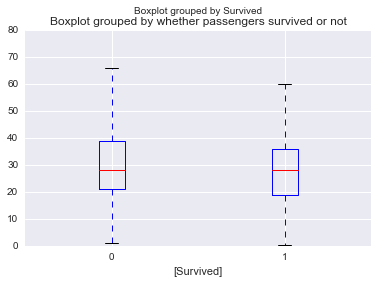

In [117]:
titanic_df.boxplot(column=['Age'], by=['Survived'])
plt.title('Boxplot grouped by whether passengers survived or not')

# 2.2. Gender of passengers and survival

All passengers by gender
male      577
female    314
Name: Sex, dtype: int64
Axes(0.125,0.125;0.775x0.775)


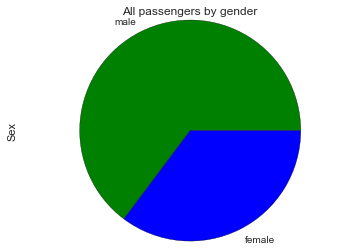

Passengers who didn't survive
male      468
female     81
Name: Sex, dtype: int64



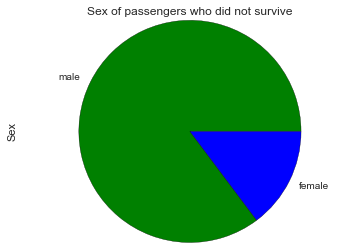

Passengers who survived
female    233
male      109
Name: Sex, dtype: int64



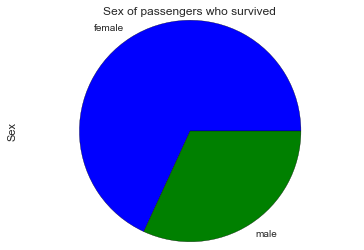

In [118]:
did_survive = titanic_df[survived]['Sex']
didnt_survive = titanic_df[did_not_survive]['Sex']

colors=['green', 'blue']

print "All passengers by gender"
print titanic_df['Sex'].value_counts()
print titanic_df['Sex'].value_counts().plot.pie(colors=colors)
plt.title('All passengers by gender')
plt.axis('equal')
plt.show()

print "Passengers who didn't survive"
print didnt_survive.value_counts()
print""""""
didnt_survive.value_counts().plot.pie(colors=colors)
plt.title('Sex of passengers who did not survive')
plt.axis('equal')
plt.show()

print "Passengers who survived"
print did_survive.value_counts()
print""""""
did_survive.value_counts().plot.pie()
plt.title('Sex of passengers who survived')
plt.axis('equal')
plt.show()

The proportion of male passengers who did not survive was significantly higher than female. Conversely, passengers who survived were proportionally more likely to be female.

# 2.3. Class of passengers and survival

3    491
1    216
2    184
Name: Pclass, dtype: int64


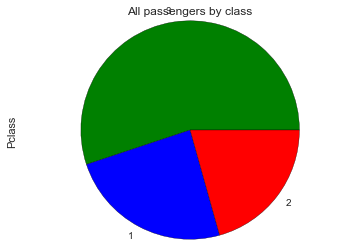

Axes(0.125,0.125;0.775x0.775)


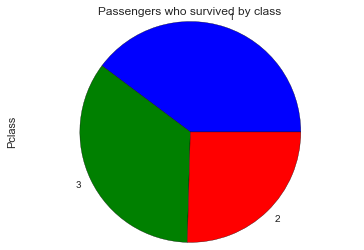

Axes(0.125,0.125;0.775x0.775)


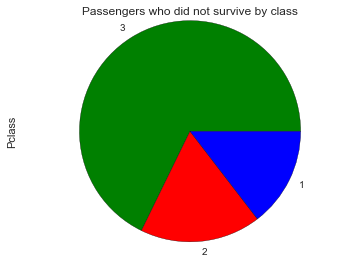

In [119]:
colors2 = ['green', 'blue','red']
print titanic_df['Pclass'].value_counts()
titanic_df['Pclass'].value_counts().plot.pie(colors=colors2)
plt.title('All passengers by class')
plt.axis('equal')
plt.show()

print titanic_df[survived]['Pclass'].value_counts().plot.pie()
plt.title('Passengers who survived by class')
plt.axis('equal')
plt.show()

colors1 = ['green', 'red','blue']
print titanic_df[did_not_survive]['Pclass'].value_counts().plot.pie(colors=colors1)
plt.title('Passengers who did not survive by class')
plt.axis('equal')
plt.show()

In the sample, passengers who did not survive were proportionally more likely to be 3rd class passengers, but this may be attributable to the fact that there were a larger number of third class passengers in the population. Compared to how the population as a whole was distributed, the proportion of first class passengers who survived is larger.

To further explore any correlation between class and likelihood of survival, data on fare was also analysed.

In [120]:
print "Fare statistics for population"
print titanic_df['Fare'].describe()
print """"""
print "Passengers who survived by fare"
print titanic_df[survived]['Fare'].describe()
print """"""
print "Passengers who did not survive by fare"
print titanic_df[did_not_survive]['Fare'].describe()

Fare statistics for population
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Passengers who survived by fare
count    342.000000
mean      48.395408
std       66.596998
min        0.000000
25%       12.475000
50%       26.000000
75%       57.000000
max      512.329200
Name: Fare, dtype: float64

Passengers who did not survive by fare
count    549.000000
mean      22.117887
std       31.388207
min        0.000000
25%        7.854200
50%       10.500000
75%       26.000000
max      263.000000
Name: Fare, dtype: float64


Among passengers who survived, the fare paid was slightly above the population mean. Conversely passengers who did not survive paid fares that were below the population mean.

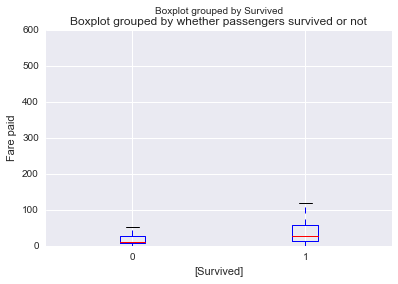

In [121]:
titanic_df.boxplot(column=['Fare'], by=['Survived'])
plt.title('Boxplot grouped by whether passengers survived or not')
plt.ylabel('Fare paid')
plt.show()

# Question for reviewer: is there a reason why the boxplot is scaled so small?

# 3. Conclusion

While neither rigourous statistics or machine learning were used to corroborate findings, exploration of the above variables showed some tentative findings that would benefit from further analysis. These tentative findings showed gender and class as variables which demonstrated some correlation to likelihood of survival.

In further assessing the rigour of these findings, it is useful to consider the representativeness of the dataset. The Titanic Data was a sample of 891 passengers, but the total number of passengers and crew onboard the Titanic RMS totalled 2224. 